In [174]:
%matplotlib inline

import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [203]:
def decision_vals(x):
    expected = x[0]/(x[0] + x[1])
    # uncertainty = 0
    uncertainty = sigma * (x[0] * x[1])/((x[0] + x[1])**2 * (x[0] + x[1] + 1))
    return (expected + uncertainty)

def entropy(prob_arr):    
    arr = list(map((lambda x : x * math.log(x)), prob_arr))
    return -1 * sum(arr)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def prob_index(probs):
    r = random.random()
    index = 0
    while(r >= 0 and index < len(probs)):
        r -= probs[index]
        index += 1
    return index - 1

# arbitrary reward probabilities
rewards = [0.1, 0.3, 0.5, 0.7, 0.9]
# initialize distribution params to all be (alpha, beta) = (1, 1)
dist_params = [[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
# model parameters
sigma = 0.5
beta = 1 # for softmax

counts = [0, 0, 0, 0, 0]
entropy_arr = []

for i in range(200):
    value_arr = list(map(decision_val, dist_params))
    prob_arr = softmax(value_arr)
    # compute current entropy
    entropy_arr.append(entropy(prob_arr))
    # choose option given probability array
    chosen_index = prob_index(prob_arr)
    counts[chosen_index] += 1
    # give reward based on chosen option's probability, update values based on reward
    reward = random.random()
    if reward < rewards[chosen_index]:
        dist_params[chosen_index][0] += 1
    else:
        dist_params[chosen_index][1] += 1

print counts
print dist_params

[27, 34, 44, 51, 44]
[[3.0, 26.0], [11.0, 25.0], [20.0, 26.0], [39.0, 14.0], [39.0, 7.0]]


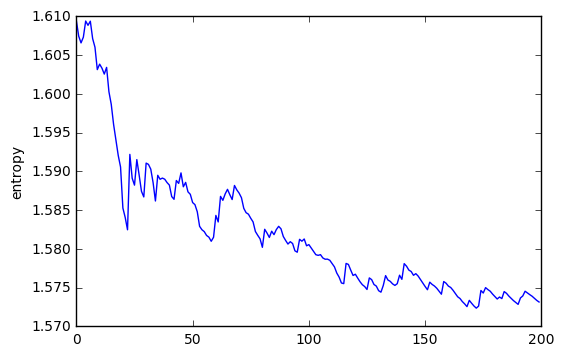

In [204]:
plt.plot(entropy_arr)
plt.ylabel('entropy')
plt.show()